In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from bs4 import BeautifulSoup as bs 
import requests 

In [2]:
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

# GET DEMOGRAPHIC AND ECONOMIC DATA 

In [3]:
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
page = requests.get(url, headers=header).content
soup=bs(page,'html.parser')
trs=soup.select('div[class="col-md-6"] tbody tr a')

data_demographics=pd.DataFrame()
for tr in trs:
    new_url='https://www.worldometers.info'+tr['href']
    page = requests.get(new_url, headers=header).content
    df=pd.read_html(page)[1]
    df=df.iloc[:,:-1]
    df['Country']=tr.text
    data_demographics=pd.concat([data_demographics,df],ignore_index=True)

In [4]:
url = 'https://www.worldometers.info/gdp/gdp-by-country/'
page = requests.get(url, headers=header).content
soup=bs(page,'html.parser')
trs=soup.select('div[class="col-md-12"] tbody tr a')

data_economics=pd.DataFrame()
for tr in trs:
    new_url='https://www.worldometers.info'+tr['href']
    page = requests.get(new_url, headers=header).content
    df=pd.read_html(page)[1]
    #df=df.iloc[:,:-1]
    df['Country']=tr.text
    data_economics=pd.concat([data_economics,df],ignore_index=True)

# DISPLAY DATAFRAMES 

In [5]:
data_economics=data_economics.iloc[:,:-3]
data_economics

Year GDP Nominal (Current USD) GDP Real (Inflation adj.) GDP change  \
0     2017.0       $19,485,394,000,000       $17,348,625,758,200      2.27%   
1     2016.0       $18,707,189,000,000       $16,972,347,070,400      1.49%   
2     2015.0       $18,219,297,000,000       $16,710,458,234,000      2.86%   
3     2014.0       $17,521,747,000,000       $16,242,525,613,600      2.57%   
4     2013.0       $16,784,851,000,000       $15,853,794,839,100      1.68%   
...      ...                       ...                       ...        ...   
4328  1998.0               $12,757,633               $29,758,863     15.50%   
4329  1997.0               $12,700,905               $25,764,977     10.00%   
4330  1996.0               $12,334,846               $23,422,020     -5.96%   
4331  1995.0               $11,025,945               $24,906,804     -5.00%   
4332  1994.0               $10,886,826               $26,218,914     10.28%   

     GDP per capita Pop. change   Population        Country  
0           $53,366      0.64 %  325084756.0  United States  
1           $52,543      0.67 %  323015995.0  United States  
2           $52,077      0.69 %  320878310.0  United States  
3           $50,969      0.72 %  318673411.0  United States  
4           $50,107      0.75 %  316400538.0  United States  
...             ...         ...          ...            ...  
4328         $3,189      0.10 %       9332.0         Tuvalu  
4329         $2,764      0.00 %       9323.0         Tuvalu  
4330         $2,512      0.27 %       9323.0         Tuvalu  
4331         $2,679      0.50 %       9298.0         Tuvalu  
4332         $2,834      0.63 %       9252.0         Tuvalu  

[4333 rows x 8 columns]

In [6]:
data_demographics=data_demographics.iloc[:,63:]
data_demographics=data_demographics[data_demographics.notna().all(axis=1)]
data_demographics

Country Country's Share of World Pop  Density (P/Km²)  Fertility Rate  \
0     Honduras                       0.13 %             89.0            2.49   
1     Honduras                       0.13 %             87.0            2.68   
2     Honduras                       0.13 %             86.0            2.68   
3     Honduras                       0.12 %             84.0            2.68   
4     Honduras                       0.12 %             83.0            2.68   
...        ...                          ...              ...             ...   
3483     India                      15.27 %            210.0            5.41   
3484     India                      15.00 %            187.0            5.72   
3485     India                      14.95 %            168.0            5.89   
3486     India                      14.85 %            152.0            5.90   
3487     India                      14.78 %            138.0            5.90   

      Median Age  Migrants (net)   Population Urban Pop % Urban Population  \
0           24.3         -6800.0    9904607.0      57.3 %        5672054.0   
1           22.9         -6800.0    9746117.0      56.7 %        5523992.0   
2           22.9         -6800.0    9587522.0      56.1 %        5376802.0   
3           22.9         -6800.0    9429013.0      55.5 %        5230757.0   
4           22.9         -6800.0    9270795.0      54.9 %        5086183.0   
...          ...             ...          ...         ...              ...   
3483        19.7        421208.0  623102897.0      21.3 %        132533810   
3484        19.3        -68569.0  555189792.0      19.7 %        109388950   
3485        19.6        -17078.0  499123324.0      18.7 %         93493844   
3486        20.2        -30805.0  450547679.0      17.9 %         80565723   
3487        20.7        -21140.0  409880595.0      17.6 %         71958495   

      World Population    Year Yearly % Change  Yearly Change  
0         7.794799e+09  2020.0          1.63 %       158490.0  
1         7.713468e+09  2019.0          1.65 %       158595.0  
2         7.631091e+09  2018.0          1.68 %       158509.0  
3         7.547859e+09  2017.0          1.71 %       158218.0  
4         7.464022e+09  2016.0          1.73 %       157879.0  
...                ...     ...             ...            ...  
3483      4.079481e+09  1975.0          2.33 %     13582621.0  
3484      3.700437e+09  1970.0          2.15 %     11213294.0  
3485      3.339584e+09  1965.0          2.07 %      9715129.0  
3486      3.034950e+09  1960.0          1.91 %      8133417.0  
3487      2.773020e+09  1955.0          1.72 %      6711079.0  

[3294 rows x 13 columns]

# MERGE DATA

In [7]:
merged=data_economics.merge(data_demographics,on=['Country','Year'])

In [8]:
for column in merged.select_dtypes('object').columns:
    if column!='Country':
        merged[column]=merged[column].str.replace('$','',regex=True,case=False)\
        .str.replace('%','',regex=True,case=False)\
        .str.replace(',','',regex=True,case=False)\
        .str.replace('N.A.','',regex=True,case=False)\
        .str.strip()

In [9]:
merged=merged.apply(pd.to_numeric,errors='ignore')

In [10]:
url = 'https://www.worldometers.info/country-codes/'
page = requests.get(url, headers=header).content
iso_codes=pd.read_html(page)[0]

In [11]:
merged=merged.merge(iso_codes[['Country (or dependency)','2-letter ISO']],left_on='Country',right_on='Country (or dependency)').drop('Country (or dependency)',axis=1)

In [12]:
merged=merged.sort_values(['Country','Year'])
merged.head()

Year  GDP Nominal (Current USD)  GDP Real (Inflation adj.)  GDP change  \
758  2005.0                 6209137625                 9164598459         NaN   
757  2010.0                15856574731                15856574731         NaN   
756  2015.0                19907111419                19759744157         NaN   
755  2016.0                19046357714                20206376461         NaN   
754  2017.0                19543976895                20744935406         NaN   

     GDP per capita  Pop. change  Population_x      Country  \
758             357          NaN    25654277.0  Afghanistan   
757             543          NaN    29185507.0  Afghanistan   
756             574          NaN    34413603.0  Afghanistan   
755             571          NaN    35383032.0  Afghanistan   
754             572          NaN    36296113.0  Afghanistan   

     Country's Share of World Pop  Density (P/Km²)  Fertility Rate  \
758                          0.39             39.0            7.18   
757                          0.42             45.0            6.48   
756                          0.47             53.0            5.45   
755                          0.47             54.0            5.26   
754                          0.48             56.0            5.26   

     Median Age  Migrants (net)  Population_y  Urban Pop %  Urban Population  \
758        16.0        148839.0    25654277.0         22.2               NaN   
757        15.9       -209272.0    29185507.0         23.4               NaN   
756        17.2        104354.0    34413603.0         24.3               NaN   
755        17.4        -62920.0    35383032.0         24.5               NaN   
754        17.4        -62920.0    36296113.0         24.7               NaN   

     World Population  Yearly % Change  Yearly Change 2-letter ISO  
758      6.541907e+09             4.30       974865.0          AFG  
757      6.956824e+09             2.61       706246.0          AFG  
756      7.379797e+09             3.35      1045619.0          AFG  
755      7.464022e+09             2.82       969429.0          AFG  
754      7.547859e+09             2.58       913081.0          AFG

# PLOT DATA 

In [13]:
fig = px.choropleth(merged, locations="2-letter ISO",
                    color="Population_x", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information,
                    scope='europe', #africa
                    color_continuous_scale=px.colors.sequential.Reds,
                    animation_frame='Year'
                   )


fig.update_layout(coloraxis_colorbar=dict(title="Population"))
fig.update_layout(title='Population')



fig.show()

In [14]:
merged=merged.replace('United States','United States of America')
merged=merged.replace('DR Congo','Dem. Rep. Congo')
merged=merged.replace('Central African Republic','Central African Rep.')
merged=merged.replace('South Sudan','S. Sudan')

In [15]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world_geo=world[['name','iso_a3','geometry']]

merged=merged.merge(world_geo,left_on='Country',right_on='name',how='left')

from geopandas import GeoDataFrame
merged = GeoDataFrame(merged)

In [16]:
data_demographics=data_demographics.replace('United States','United States of America')
data_demographics=data_demographics.replace('DR Congo','Dem. Rep. Congo')
data_demographics=data_demographics.replace('Central African Republic','Central African Rep.')
data_demographics=data_demographics.replace('South Sudan','S. Sudan')

In [17]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world_geo=world[['name','iso_a3','geometry']]

df=data_demographics.merge(world_geo,left_on='Country',right_on='name',how='left')

from geopandas import GeoDataFrame
df = GeoDataFrame(df)

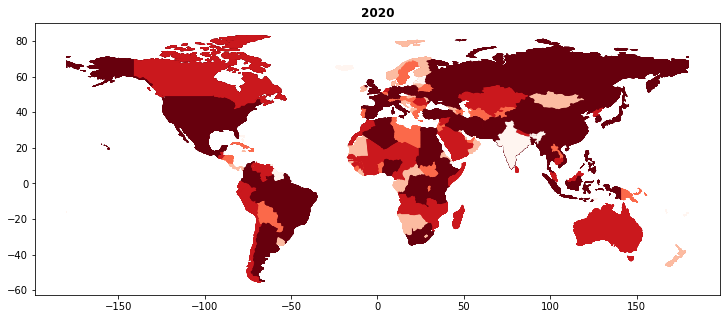

In [18]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


fig,ax=plt.subplots(1,1,figsize=(15,5))

def animation_bar(year):
    filtered=df[df['Year']==year]  
    filtered.plot(ax=ax,column='Population',cmap='Reds',scheme='quantiles')
    ax.set_title(int(year),fontweight='bold')
    
animator=animation.FuncAnimation(fig,animation_bar,frames=sorted(df['Year'].unique()),interval=300)
HTML(animator.to_jshtml())